<a href="https://colab.research.google.com/github/Buggy04/QAP-with-Genetic-Algorithm/blob/main/QAP_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.1 MB/s 


In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [ ]:
import random
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
distance=[(0,22,53,53),(22,0,40,62),(53,40,0,55),(53,62,55,0)]
flow=[(0,3,0,2),(3,0,0,1),(0,0,0,4),(2,1,4,0)]
#distance=[(0,50,50,94,50),(50,0,22,50,36),(50,22,0,44,14),(94,50,44,0,50),(50,36,14,50,0)]
#flow=[(0,0,2,0,3),(0,0,0,3,0),(2,0,0,0,0),(0,3,0,0,1),(3,0,0,1,0)]
#distance=[(0,40,64,36,22,60),(40,0,41,22,36,72),(64,41,0,28,44,53),(36,22,28,0,20,50),(22,36,44,20,0,41),(60,72,53,50,41,0)]
#flow=[(0,1,1,2,0,0),(1,0,0,0,0,2),(1,0,0,0,0,1),(2,0,0,0,3,0),(0,0,0,3,0,0),(0,2,1,0,0,0)]
#distance=[(0,35,71,99,71,75,41),(35,0,42,80,65,82,47),(71,42,0,45,49,79,55),(99,80,45,0,36,65,65),(71,65,49,36,0,31,32),(75,82,79,65,31,0,36),(41,47,55,65,32,36,0)]
#flow=[(0,2,0,0,0,0,2),(2,0,3,0,0,1,0),(0,3,0,0,0,1,0),(0,0,0,0,3,0,1),(0,0,0,3,0,0,0),(0,1,1,0,0,0,0),(2,0,0,1,0,0,0)]
#distance=[(0,32,68,97,75,70,75,40),(32,0,42,80,53,65,82,47),(68,42,0,45,15,49,79,55),(97,80,45,0,30,36,65,65),(75,53,15,30,0,38,69,53),(70,65,49,36,38,0,31,32),(75,82,79,65,69,31,0,36),(40,47,55,65,53,32,36,0)]
#flow=[(0,2,4,0,0,0,2,0),(2,0,3,1,0,1,0,0),(4,3,0,0,0,1,0,0),(0,1,0,0,3,0,1,5),(0,0,0,3,0,0,0,0),(0,1,1,0,0,0,0,0),(2,0,0,1,0,0,0,4),(0,0,0,5,0,0,4,0)]
#distance=[(0,32,68,97,75,70,75,40,24),(32,0,42,80,53,65,82,47,29),(68,42,0,45,15,49,79,55,50),(97,80,45,0,30,36,65,65,73),(75,53,15,30,0,38,69,53,53),(70,65,49,36,38,0,31,32,46),(75,82,79,65,69,31,0,36,56),(40,47,55,65,53,32,36,0,19),(24,29,50,73,53,46,56,19,0)]
#flow=[(0,2,4,0,0,0,2,0,0),(2,0,3,1,0,6,0,0,2),(4,3,0,0,0,3,0,0,0),(0,1,0,0,1,0,1,2,0),(0,0,0,1,0,0,0,0,0),(0,6,3,0,0,0,0,0,2),(2,0,0,1,0,0,0,4,3),(0,0,0,2,0,0,4,0,0),(0,2,0,0,0,2,3,0,0)]

len(flow)

4

-- Best Ever Individual =  Individual('i', [2, 3, 0, 1])
-- Best Ever Fitness =  395.0


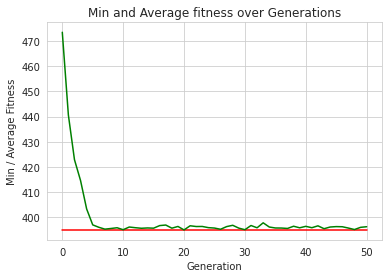

In [ ]:
# set the random seed for repeatable results
RANDOM_SEED = 37
random.seed(RANDOM_SEED)

# Genetic Algorithm constants:
POPULATION_SIZE = 200
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.02   # probability for mutating an individual

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(flow)), len(flow))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def GetQAPDistance(individual):
  calculo=0
  for i in range(len(individual)):
    for j in range(i,len(individual)):
      F=flow[i][j]
      D=distance[individual[i]][individual[j]]
      calculo+=F*D
  return calculo

def QAPDistance(individual):
  return GetQAPDistance(individual),

toolbox.register("evaluate", QAPDistance)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(flow))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

    # print best individual info:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # show both plots:
    plt.show()

if __name__ == "__main__":
    main()